In [1]:
#GRUPP 23 LABB 1 Task 2
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from pandas import DataFrame as df
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
import os
import plotly.graph_objects as go
%matplotlib inline
import warnings
from scipy.cluster.hierarchy import dendrogram, linkage
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv("Wholesale customers data.csv")
df1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
print (df1.dtypes)

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


In [4]:
df1.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


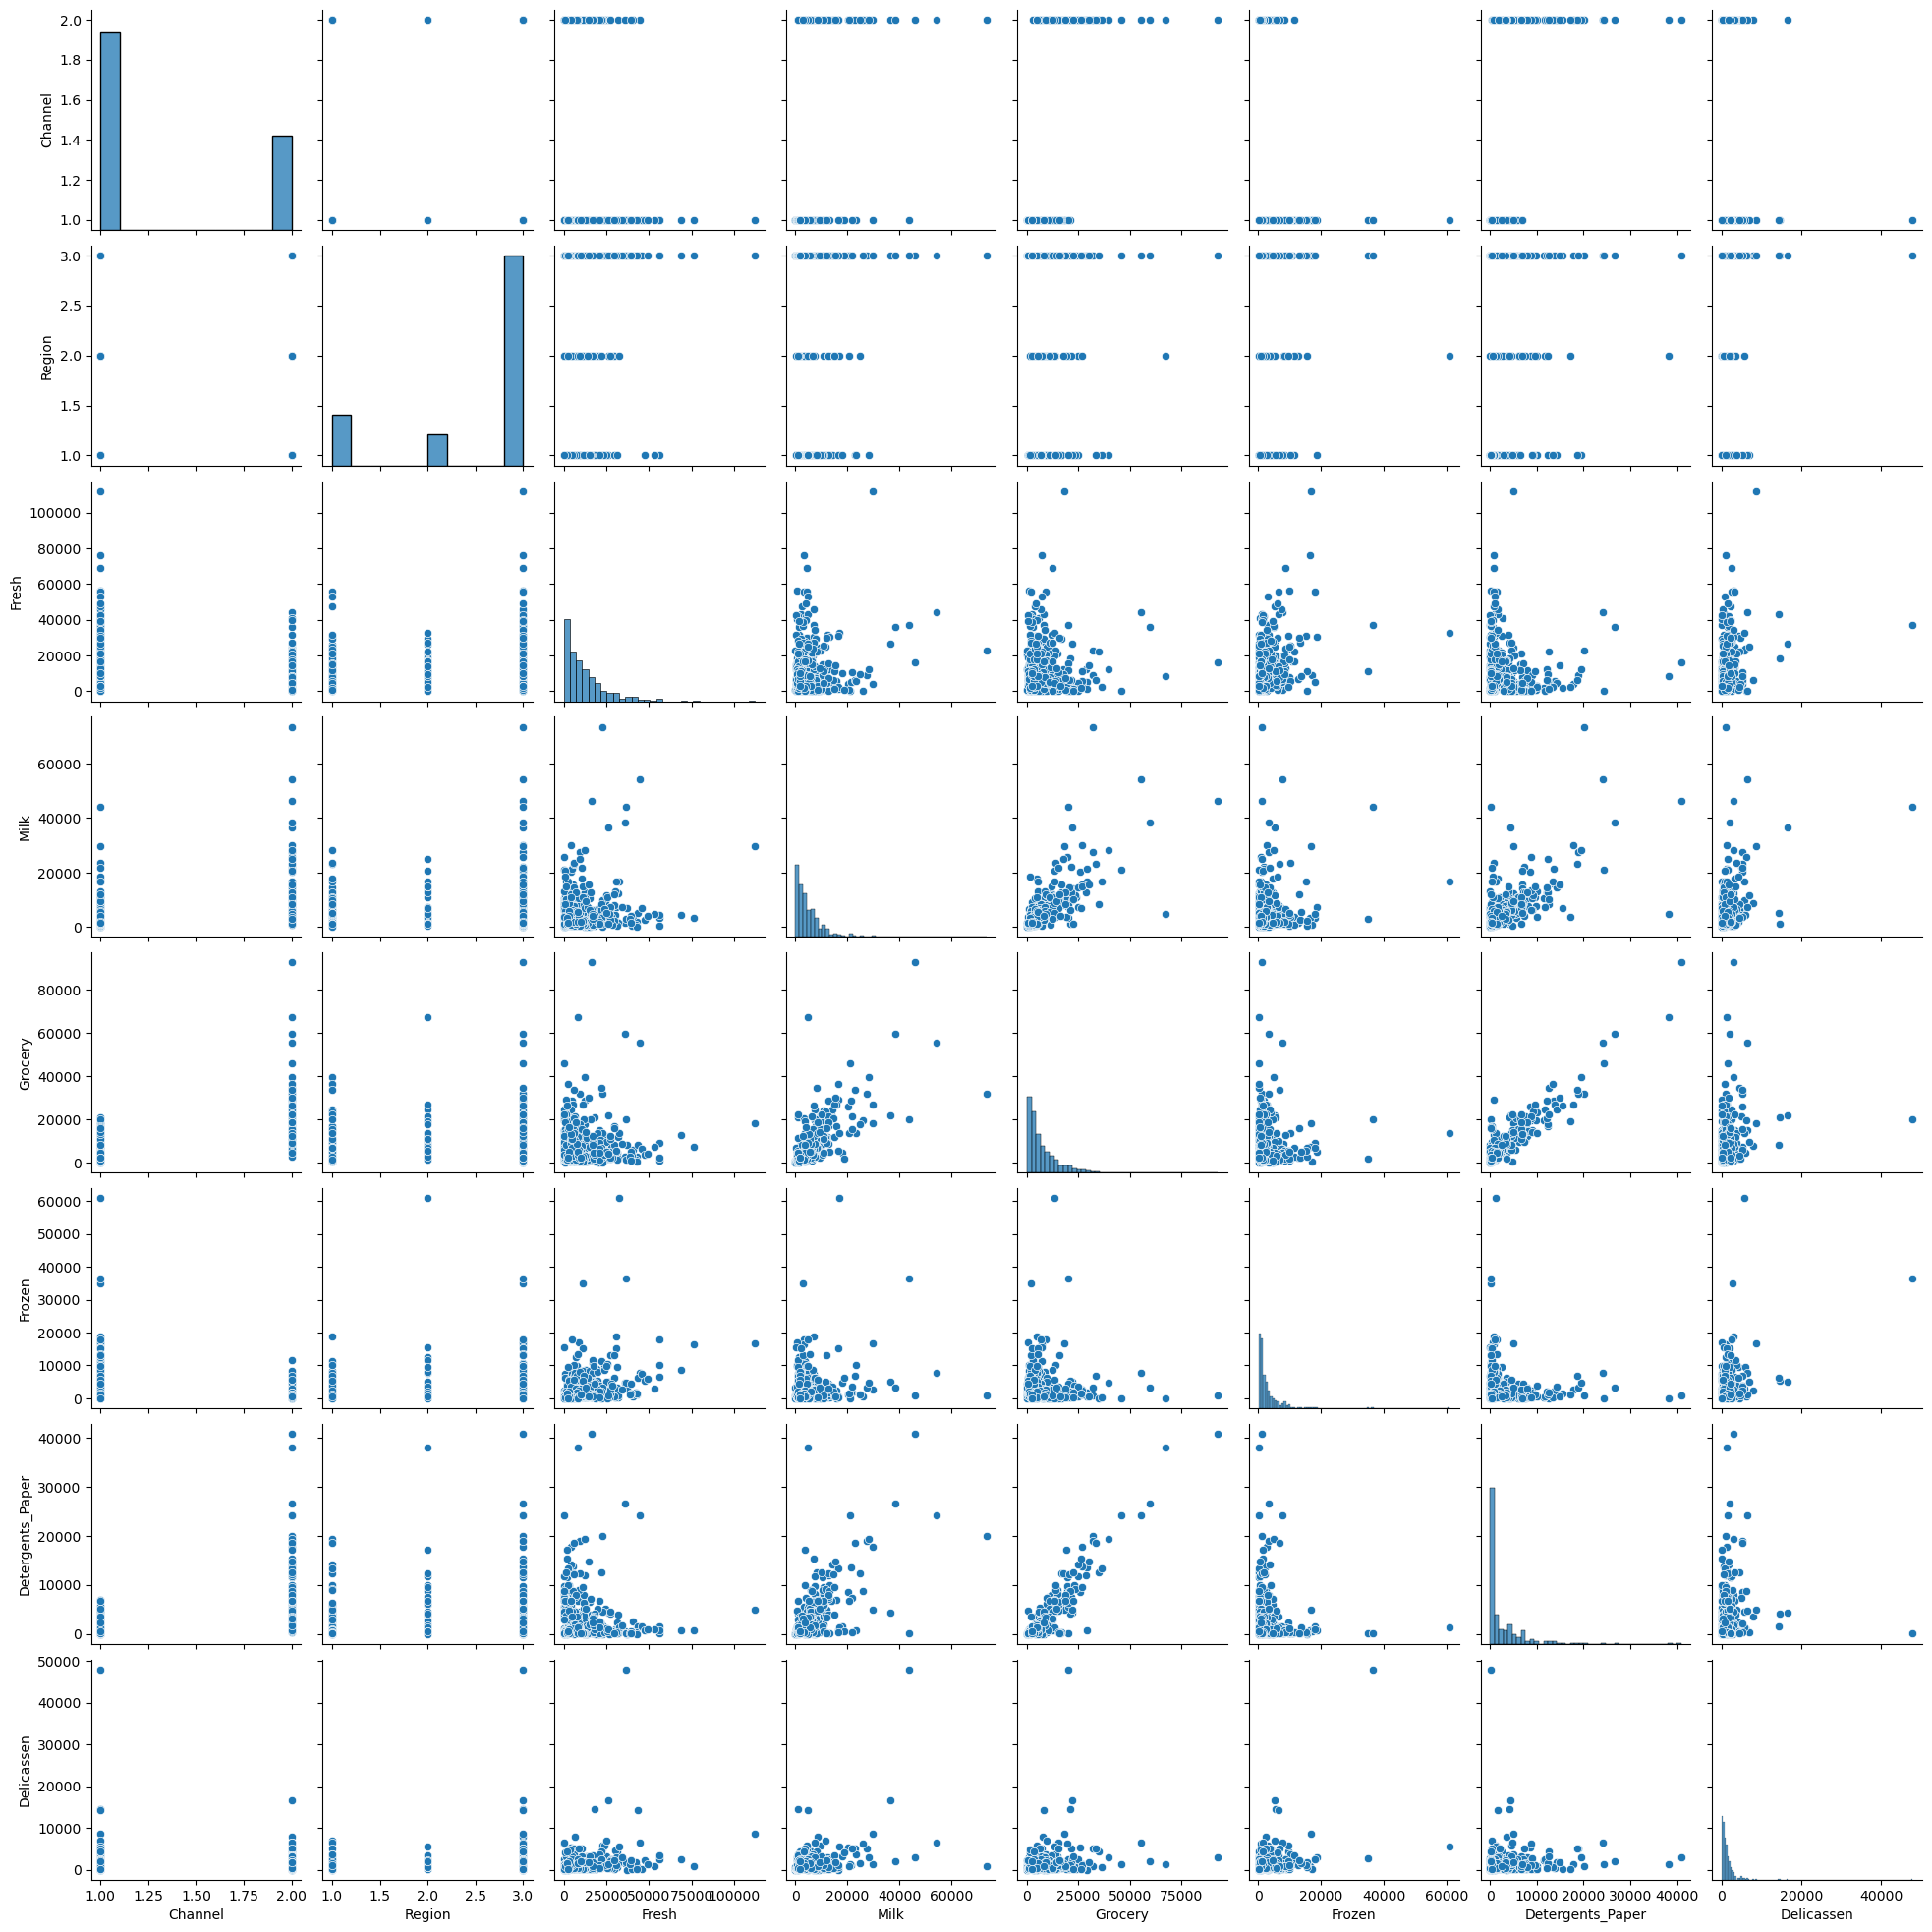

In [5]:
#Task 2.1
sns.pairplot(data=df1, vars=['Channel','Region','Fresh', 'Milk','Grocery','Frozen','Detergents_Paper','Delicassen'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

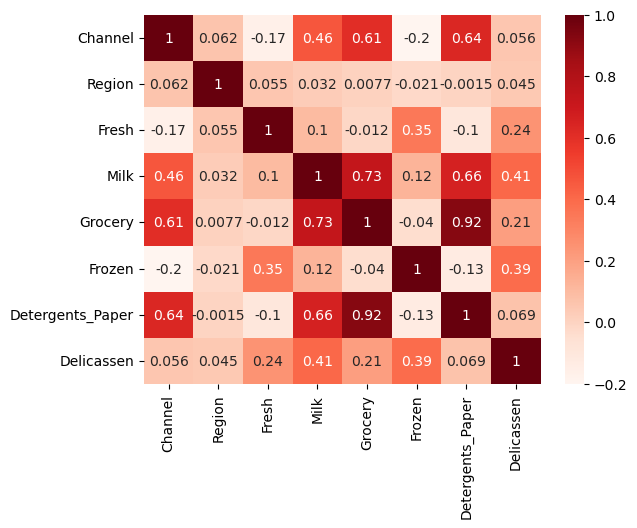

In [6]:
#Task 2.1
df1[['Channel','Region','Fresh', 'Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].corr()

sns.heatmap(df1[['Channel','Region','Fresh', 'Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].corr(), annot=True, cmap='Reds')
plt.show

In [7]:
#Task 2.3
df1.loc[:, ["Grocery","Detergents_Paper"]]

,Grocery,Detergents_Paper
0,7561,2674
1,9568,3293
2,7684,3516
3,4221,507
4,7198,1777
...,...,...
435,16027,182
436,764,93
437,30243,14841
438,2232,168


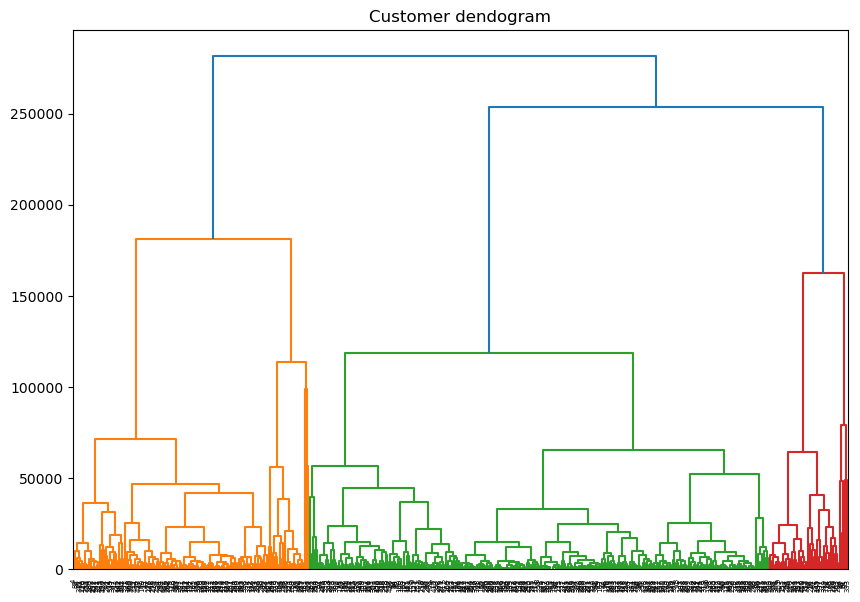

In [8]:
#Task 2.3
plt.figure(figsize=(10,7))
plt.title("Customer dendogram")
dend = shc.dendrogram(shc.linkage(df1, method='ward'))

In [9]:
print (df1.dtypes)

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


In [10]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(df1)
print(cluster.labels_)

[0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1
 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0
 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1
 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0
 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0]


In [11]:
plt.scatter(df1.loc[:, ["Detergents_Paper"]], c=cluster.labels_, cmap='rainbow')

TypeError: scatter() missing 1 required positional argument: 'y'

In [14]:
plt.scatter(df1.loc[:, "Detergents_Paper"], df1.loc[:, "SomeOtherFeature"], c=cluster.labels_, cmap='rainbow')

KeyError: 'SomeOtherFeature'

In [12]:
X = df1
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

InvalidIndexError: (slice(None, None, None), 0)

<function matplotlib.pyplot.show(close=None, block=None)>

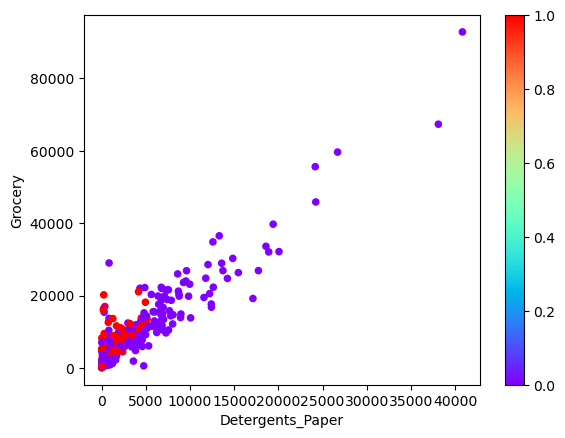

In [13]:
df1.plot.scatter(x="Detergents_Paper", y="Grocery",  c=cluster.labels_, cmap='rainbow')
plt.show